In [132]:
"""Importing Libraries"""
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopWord = stopwords.words('english')
from wordcloud import WordCloud

In [133]:
tweet = pd.read_csv('/Users/poornankpurohit/Desktop/train 2.csv')

In [134]:
tweet.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [135]:
tweet["tweet"].value_counts()

#model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦                      319
i finally found a way how to delete old tweets! you might find it useful as well:    #deletetweets         82
aww yeah it's all good bing bong bing bong                                                                 75
i'm so   and #grateful now that - #affirmations                                                            56
@user you might be a libtard if... #libtard  #sjw #liberal #politics                                       40
                                                                                                         ... 
family time #you?   #move #bodyandsoul                                                                      1
nobody clicked the tag to see what was going on, it was  . lol                                              1
the scientific facts of happiness you never knew  #healthy   #mind                                          1
 @user #be

In [136]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [137]:
def preprocessing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    tweets = [w for w in tweet_tokens if not w in stopWord]
    return " ".join(tweets)

In [138]:
tweet.tweet = tweet['tweet'].apply(preprocessing)

In [139]:
tweet.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [140]:
tweet["tweet"].value_counts()

model love u take u time ur                                                                  319
finally found way delete old tweets might find useful well deletetweets                       82
aww yeah good bing bong bing bong                                                             75
happy work conference right mindset leads cultureofdevelopment organizations work mindset     64
im grateful affirmations                                                                      56
                                                                                            ... 
user tried create user collage hope someone like davidlabravasunday                            1
damn posed b family reunion weekend smh never even one smh                                     1
words red find im barely sit still hold thought head cant sleep need user                      1
tickets booked com                                                                             1
thank user follow             

In [141]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [142]:
tweet = tweet.drop_duplicates('tweet')

In [143]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29345 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      29345 non-null  int64 
 1   label   29345 non-null  int64 
 2   tweet   29345 non-null  object
dtypes: int64(2), object(1)
memory usage: 917.0+ KB


In [144]:
tweet.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [145]:
tweet['label'].value_counts()

0    27352
1     1993
Name: label, dtype: int64

/Users/poornankpurohit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

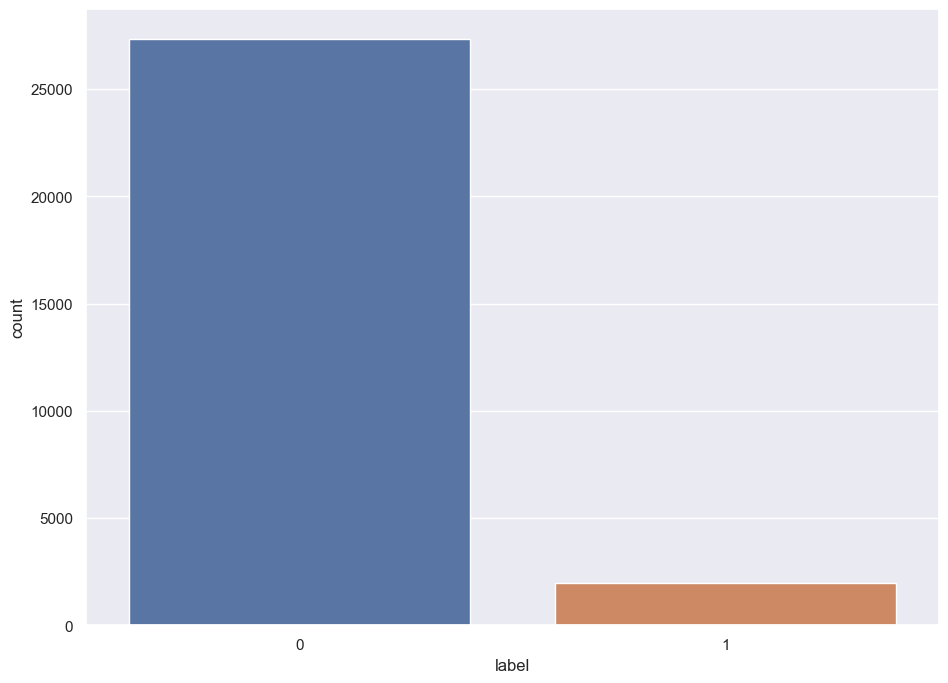

In [152]:
sns.countplot(tweet['label'])

In [153]:
non_hate = tweet[tweet.label==0]
non_hate.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [154]:
hate = tweet[tweet.label==1]
hate.head()

,id,label,tweet
13,14,1,user cnn calls michigan middle school build wa...
14,15,1,comment australia opkillingbay seashepherd hel...
17,18,1,retweet agree
23,24,1,user user lumpy says prove lumpy
34,35,1,unbelievable 21st century wed need something l...


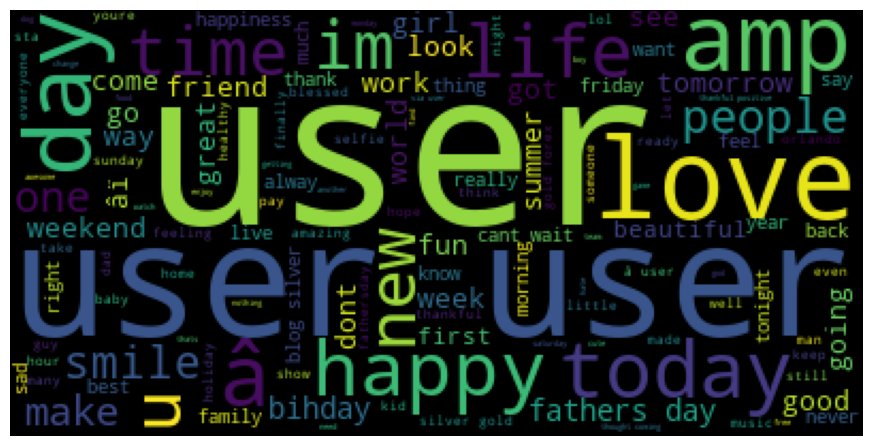

In [155]:
text = ' '.join([word for word in non_hate['tweet']])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

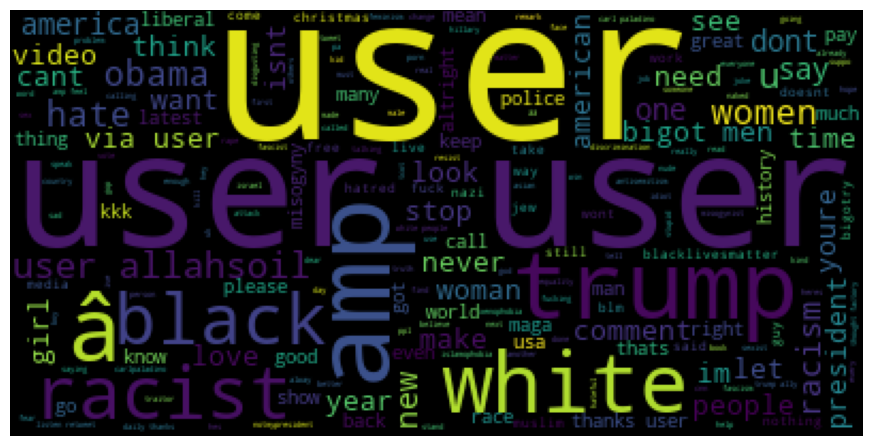

In [156]:
text = ' '.join([word for word in hate['tweet']])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()